# Tiền xử lý


## Thêm thư viện

In [ ]:
# Cài đặt nếu cần
install.packages("e1071")
install.packages("caret")
install.packages("Metrics")
install.packages("ggplot2")

# Nạp thư viện
library(e1071)
library(caret)
library(Metrics)
library(ggplot2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘proxy’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘iterators’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘sparsevctrs’, ‘timeDate’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: ggplot2

Loading required package: lattice


Attaching package: ‘Metrics’


The following objects are masked from ‘package:caret’:

    precision, recall




## Nạp dữ liệu

In [ ]:
wine <- read.csv("winequality-red - Copy.csv")

In [ ]:
wine

fixed.acidity volatile.acidity citric.acid residual.sugar chlorides
1     7.4          0.700            0.00        1.9            0.076    
2     7.8          0.880            0.00        2.6            0.098    
3     7.8          0.760            0.04        2.3            0.092    
4    11.2          0.280            0.56        1.9            0.075    
5     7.4          0.700            0.00        1.9            0.076    
6     7.4          0.660            0.00        1.8            0.075    
7     7.9          0.600            0.06        1.6            0.069    
8     7.3          0.650            0.00        1.2            0.065    
9     7.8          0.580            0.02        2.0            0.073    
10    7.5          0.500            0.36        6.1            0.071    
11    6.7          0.580            0.08        1.8            0.097    
12    7.5          0.500            0.36        6.1            0.071    
13    5.6          0.615            0.00        1.6            0.089    
14    7.8          0.610            0.29        1.6            0.114    
15    8.9          0.620            0.18        3.8            0.176    
16    8.9          0.620            0.19        3.9            0.170    
17    8.5          0.280            0.56        1.8            0.092    
18    8.1          0.560            0.28        1.7            0.368    
19    7.4          0.590            0.08        4.4            0.086    
20    7.9          0.320            0.51        1.8            0.341    
21    8.9          0.220            0.48        1.8            0.077    
22    7.6          0.390            0.31        2.3            0.082    
23    7.9          0.430            0.21        1.6            0.106    
24    8.5          0.490            0.11        2.3            0.084    
25    6.9          0.400            0.14        2.4            0.085    
26    6.3          0.390            0.16        1.4            0.080    
27    7.6          0.410            0.24        1.8            0.080    
28    7.9          0.430            0.21        1.6            0.106    
29    7.1          0.710            0.00        1.9            0.080    
30    7.8          0.645            0.00        2.0            0.082    
⋮    ⋮             ⋮                ⋮           ⋮              ⋮        
1570 6.2           0.510            0.14         1.9           0.056    
1571 6.4           0.360            0.53         2.2           0.230    
1572 6.4           0.380            0.14         2.2           0.038    
1573 7.3           0.690            0.32         2.2           0.069    
1574 6.0           0.580            0.20         2.4           0.075    
1575 5.6           0.310            0.78        13.9           0.074    
1576 7.5           0.520            0.40         2.2           0.060    
1577 8.0           0.300            0.63         1.6           0.081    
1578 6.2           0.700            0.15         5.1           0.076    
1579 6.8           0.670            0.15         1.8           0.118    
1580 6.2           0.560            0.09         1.7           0.053    
1581 7.4           0.350            0.33         2.4           0.068    
1582 6.2           0.560            0.09         1.7           0.053    
1583 6.1           0.715            0.10         2.6           0.053    
1584 6.2           0.460            0.29         2.1           0.074    
1585 6.7           0.320            0.44         2.4           0.061    
1586 7.2           0.390            0.44         2.6           0.066    
1587 7.5           0.310            0.41         2.4           0.065    
1588 5.8           0.610            0.11         1.8           0.066    
1589 7.2           0.660            0.33         2.5           0.068    
1590 6.6           0.725            0.20         7.8           0.073    
1591 6.3           0.550            0.15         1.8           0.077    
1592 5.4           0.740            0.09         1.7           

In [ ]:
str(wine)

'data.frame':	1599 obs. of  12 variables:
 $ fixed.acidity       : num  7.4 7.8 7.8 11.2 7.4 7.4 7.9 7.3 7.8 7.5 ...
 $ volatile.acidity    : num  0.7 0.88 0.76 0.28 0.7 0.66 0.6 0.65 0.58 0.5 ...
 $ citric.acid         : num  0 0 0.04 0.56 0 0 0.06 0 0.02 0.36 ...
 $ residual.sugar      : num  1.9 2.6 2.3 1.9 1.9 1.8 1.6 1.2 2 6.1 ...
 $ chlorides           : num  0.076 0.098 0.092 0.075 0.076 0.075 0.069 0.065 0.073 0.071 ...
 $ free.sulfur.dioxide : num  11 25 15 17 11 13 15 15 9 17 ...
 $ total.sulfur.dioxide: num  34 67 54 60 34 40 59 21 18 102 ...
 $ density             : num  0.998 0.997 0.997 0.998 0.998 ...
 $ pH                  : num  3.51 3.2 3.26 3.16 3.51 3.51 3.3 3.39 3.36 3.35 ...
 $ sulphates           : num  0.56 0.68 0.65 0.58 0.56 0.56 0.46 0.47 0.57 0.8 ...
 $ alcohol             : num  9.4 9.8 9.8 9.8 9.4 9.4 9.4 10 9.5 10.5 ...
 $ quality             : int  5 5 5 6 5 5 5 7 7 5 ...


## Phân chia thành phần tập huấn luyện và kiểm thử

In [ ]:
set.seed(123)
index <- createDataPartition(wine$quality, p = 0.8, list = FALSE)
train_data <- wine[index, ]
test_data  <- wine[-index, ]

## Chuẩn hóa dữ liệu

### Chuẩn hóa các biến đầu vào (trừ biến chất lượng)

In [ ]:

pre_proc <- preProcess(train_data[, -12], method = c("center", "scale"))
train_scaled <- predict(pre_proc, train_data[, -12])
test_scaled  <- predict(pre_proc, test_data[, -12])

### Gắn lại biến chất lượng (target)

In [ ]:
train_scaled$quality <- train_data$quality
test_scaled$quality  <- test_data$quality

##  Huấn luyện mô hình SVR


In [ ]:
svr_model <- svm(quality ~ ., data = train_scaled, type = "eps-regression", kernel = "radial")

## Dự đoán & đánh giá mô hình

In [ ]:
predictions <- predict(svr_model, newdata = test_scaled)
actuals <- test_scaled$quality

mae_val  <- mae(actuals, predictions)
mse_val  <- mse(actuals, predictions)
rmse_val <- rmse(actuals, predictions)
cat("Kết quả mô hình SVR:\n")
cat("MAE  :", round(mae_val, 3), "\n")
cat("MSE  :", round(mse_val, 3), "\n")
cat("RMSE :", round(rmse_val, 3), "\n")

Kết quả mô hình SVR:
MAE  : 0.44 
MSE  : 0.371 
RMSE : 0.609 


## Trực quan hóa kết quả

`geom_smooth()` using formula = 'y ~ x'


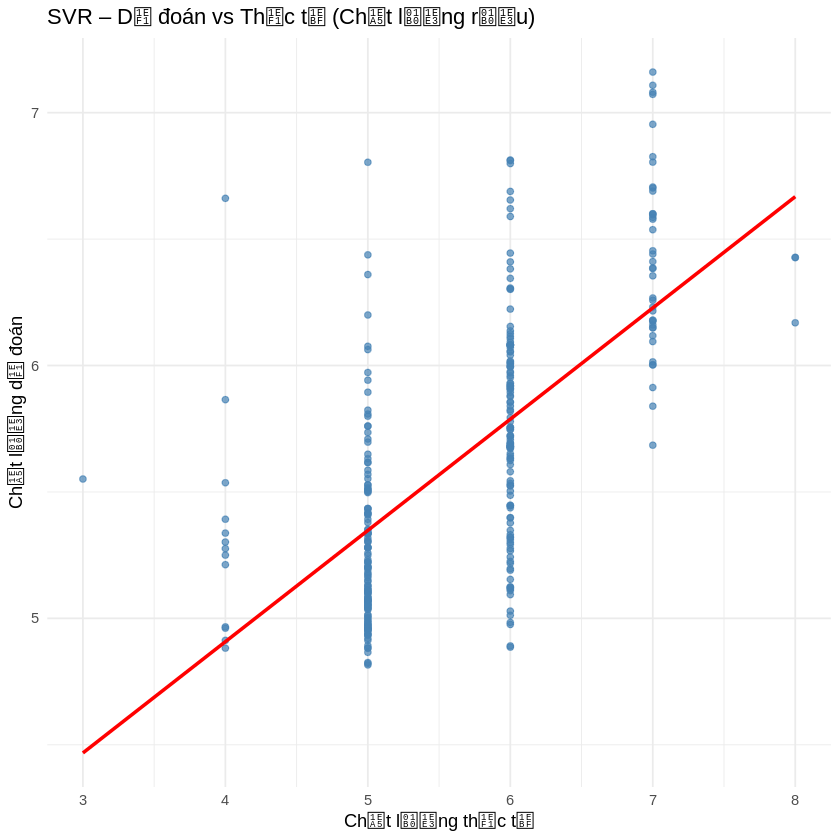

In [ ]:
ggplot(data.frame(Actual = actuals, Predicted = predictions),
       aes(x = Actual, y = Predicted)) +
  geom_point(color = "steelblue", alpha = 0.7) +
  geom_smooth(method = "lm", se = FALSE, color = "red") +
  labs(title = "SVR – Dự đoán vs Thực tế (Chất lượng rượu)",
       x = "Chất lượng thực tế", y = "Chất lượng dự đoán") +
  theme_minimal()


## Biểu đồ Residuals

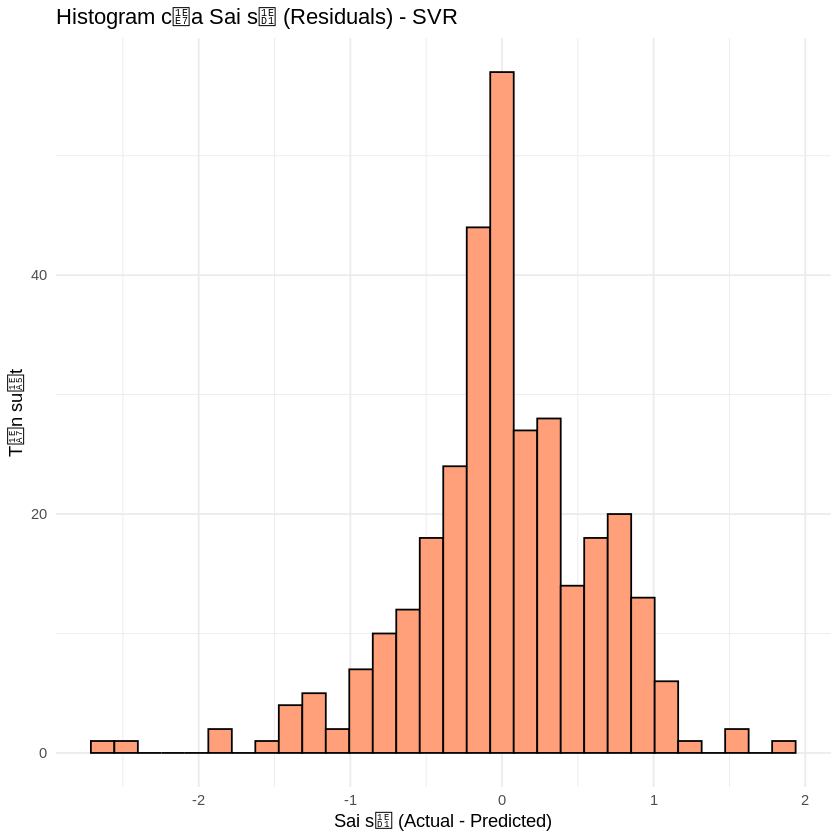

In [ ]:
residuals <- actuals - predictions
ggplot(data.frame(Residuals = residuals), aes(x = Residuals)) +
  geom_histogram(bins = 30, fill = "#ffa07a", color = "black") +
  labs(title = "Histogram của Sai số (Residuals) - SVR",
       x = "Sai số (Actual - Predicted)", y = "Tần suất") +
  theme_minimal()


## Biểu đồ Density của dự đoán

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


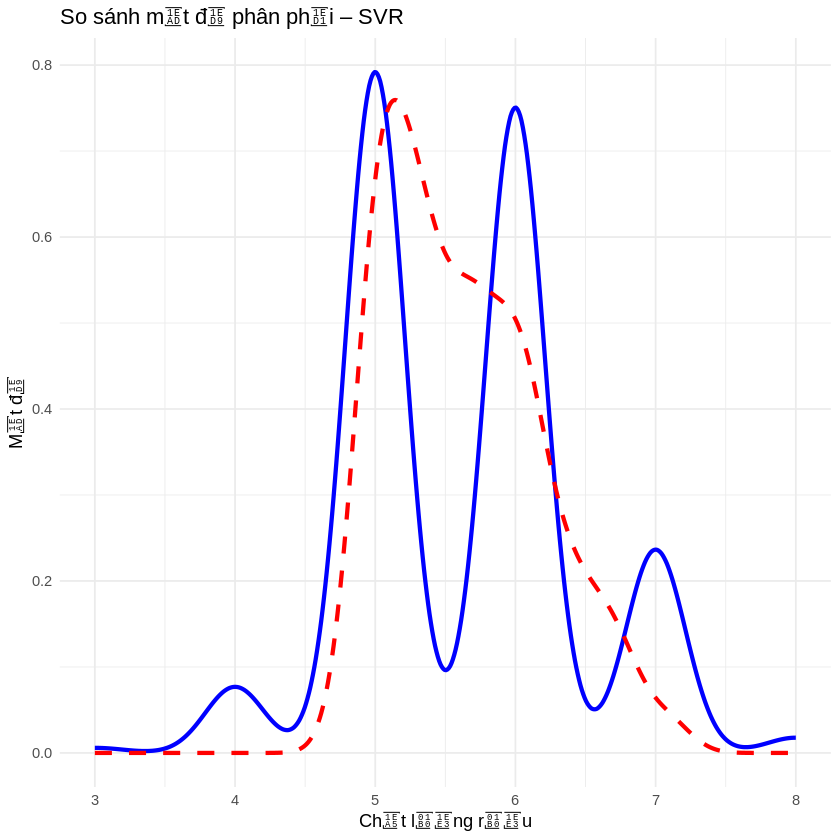

In [ ]:
library(ggplot2)
df <- data.frame(Actual = actuals, Predicted = predictions)

ggplot(df) +
  geom_density(aes(x = Actual), color = "blue", size = 1.2) +
  geom_density(aes(x = Predicted), color = "red", linetype = "dashed", size = 1.2) +
  labs(title = "So sánh mật độ phân phối – SVR",
       x = "Chất lượng rượu", y = "Mật độ") +
  theme_minimal()
